In [13]:
import numpy as np
import h5py
import os, sys
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
from scipy.stats import lognorm

import pandas as pd
sys.path.remove(sys.path[0])

sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats/tools/utils/')
#sys.path.append('/Users/ajc/CODES/ats/tools/utils/')
import get_transect_data

sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata

In [2]:
forcing_watershed_FM = h5py.File("/Users/ajc/Core/PreProcessing/ats-intermediate-ngee/data/SNAP/CESM-RCP8.5-2006-2100_dm1985-2015-FM_2006.h5",'r')

In [3]:
d1 = forcing_watershed_FM ['precipitation rain [m s^-1]']
#d2 = forcing_watershed_FM ['precipitation snow [m SWE s^-1]']
to_year_mm= 365*1000
rain_mm2 = np.reshape(d1,(-1,365)).mean(axis=1)*to_year_mm
#snow_mm2 = np.reshape(d2,(-1,365)).mean(axis=1)*to_year_mm
precip_annual_watershed_FM =  rain_mm2 #+ snow_mm2 +

In [8]:
rain = d1[:]

In [59]:
r = rain[:365]

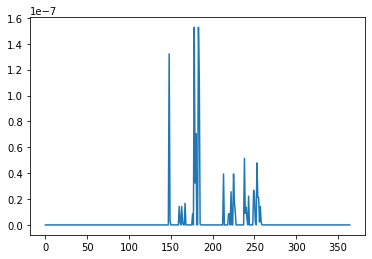

In [11]:
plt.plot(r)

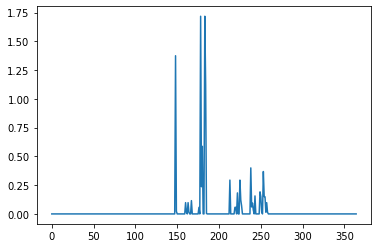

In [73]:
s=1
x = np.linspace(0,121,121)
#x = np.linspace(lognorm.ppf(140, s), lognorm.ppf(260, s), 120)
#plt.plot(x, lognorm.pdf(x, s))
f = np.exp(r/max(r)) -1
#print (f, max(r))
plt.plot(f)

In [82]:
dm_trend = h5py.File("/Users/ajc/FUSE/simulations/production/barrow_watershed/data/Barrow_Alaska/barrow1985-2015-trend-smooth.h5",'r')
dm_detrend = h5py.File("/Users/ajc/FUSE/simulations/production/barrow_watershed/data/Barrow_Alaska/barrow1985-2015-detrend-supersmooth-30pc.h5",'r')

print (len(dm_trend['air temperature [K]'])/365.)

31.0


In [96]:
keys = ['air temperature [K]','precipitation snow [m SWE s^-1]', 'incoming shortwave radiation [W m^-2]'] 
var = keys[0]

In [99]:
temp_trend = np.reshape(dm_trend[var],(-1,365)).mean(axis=1)
temp_detrend = np.reshape(dm_detrend[var],(-1,365)).mean(axis=1)

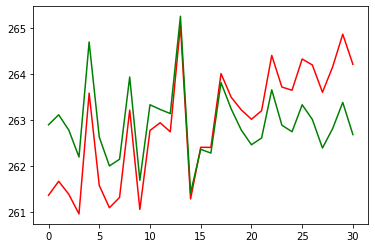

In [100]:
plt.plot(temp_trend,'r')
plt.plot(temp_detrend,'g')

3255.0